<div>
  <img style="float: left;"  width="140" src=" 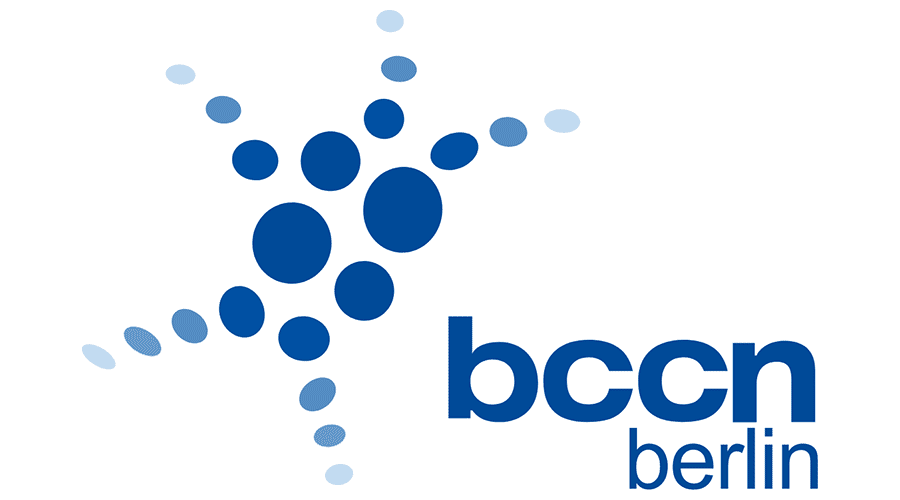">
</div>
 
<h1 id="course-title-heading">
    <div style="text-align: right">
        Models of Higher Brain Functions
        <br>Computer Course
        <br>
    </div>
</h1>
    
---
<div style="text-align: left; float: left">
    Lecturer: Prof. Dr. Henning Sprekeler
</div>

<div style="text-align: right">
    Assistant: Felix Lundt
    <br>(lundt@tu-berlin.de)
</div>



## General exercise instructions
These exercises should be completed entirely in this Jupyter Notebook (comprising source code, discussion and interpretation). Submission should be done through the Moodle interface and should consist only of this notebook (**a single `.ipynb` file**). This Jupyter Notebook was provided inside a `.zip` file, alongside additional files. Do not change the relative paths of these files when working on the assignment (meaning that e.g. `./helper.py` should always be in the same directory as this notebook).

Submission deadline is the start of the next lectue (**10:15 am on Fridays**).

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Some of the exercises will be automatically graded. Make sure that you:
1. Fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"
2. Remove all `raise NotImplementedError` lines once you inserted your solution
3. Don't use variable names starting with underscore (e.g. `_myvar`) in your code, which could interfere with the automatic grading system.

Before you start, please fill in below your names and the name of your group as shown on Moodle. Example:
```
NAMES = ["Martina Musterfrau", "John Smith"]
GROUP = "A"
```

If you have any questions about the exercises, please ask them **on the Moodle forum** of the course.

In [1]:
NAMES = ["Liam Fogarty", "Ghadi El Hasbani"]
GROUP = "G"

In [2]:
# These are a few tests to make sure that your installed Python software is not too old
import sys
assert sys.version_info.major >= 3, "Your Python version is too old, please update it."

import IPython
assert IPython.version_info[0] >= 3, "Your IPython version is too old, please update it."

---

# Week 4: Perceptual Bistability

In [3]:
# Necessary imports for this exercise, you can't modify these
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Import functions defined in the ./helpers.py file
from helpers import assert_var_defined

In [4]:
# You can add your additional package imports here

# Create plots inline in the Jupyter notebook
%matplotlib inline

## Exercise 1: A model of binocular rivalry (7 points)

In this exercise we will explore a model of binocular rivalry presented by [Laing and Chow (2002)](https://link.springer.com/content/pdf/10.1023/A:1014942129705.pdf).
While their paper included a spiking network model, we will concern ourselves only with their reduced population rate model.

### 1.1 Read (parts) of the paper
Download the paper by Laing and Chow (2002) using the link provided above. Read at least the **Abstract** and the chapter **3. Reduced Description**, up to the definition of equation (9).

Here is a copy of equations (1 - 4), which you will implementing in this exercise:

$$
\begin{align}
    \frac{du_1}{dt} &= &&−u_1 &+ &&f (\alpha u_1 g_1 − \beta u_2 g_2 − a_1 + I_1 ) && \qquad\text{(1)} \\
    \frac{du_2}{dt} &= &&−u_2 &+ &&f (\alpha u_2 g_2 − \beta u_1 g_1 − a_2 + I_2 ) && \qquad\text{(2)} \\
    \tau_a \frac{da_1}{dt} &= &&-a_1 &+ &&\phi_a f(\alpha u_1 g_1 - \beta u_2 g_2 - a_1 + I_1) && \qquad\text{(3)} \\
    \tau_a \frac{da_2}{dt} &= &&-a_2 &+ &&\phi_a f(\alpha u_2 g_2 - \beta u_1 g_1 - a_2 + I_2) && \qquad\text{(4)} \\
\end{align}
$$

### 1.2 Integrate the ordinary differential equations (ODEs) of the population rate model

#### 1.2 a) Implement the ODEs (2 points)

Complete the function `laing_chow` which implements equations (1-4) from Laing and Chow (2002) and which can be given to [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) as its first argument.

The parameters of the model should be additional arguments of `laing_chow` such that you can investigate the behavior of the model for different parameter settings. The model should use the following default parameters: $\alpha = 0.2$, $\beta = 0.4$, $g_{1} = g_{2} = 1$, $\phi_a = 0.4$, $\tau_a = 20$.


In [5]:
def laing_chow(t, y, I1, I2, alpha=0.2, beta=0.4, g1=1, g2=1, phi_a=0.4, tau_a=20):
    """
    Function to compute the derivatives in the ODEs defined in equations (1-4) 
    in Laing and Chow (2002).
    
    These ODEs can be integrated by passing this function to `scipy.integrate.solve_ivp`.
    
    Parameters
    ----------
    t : float
        Time point for which to compute the derivatives of `y`.
    y : numpy.ndarray
        Array of dynamical variables at time `t`, which dynamics are defined by the ODEs
        in equations (1-4). That means, `y = [u1, u2, a1, a2]`
    I1, I2, alpha, beta, g1, g2, phi, tau : float
        Model parameters. See Laing and Chow (2002), chapter "3. Reduced Description"
        for their meaning.
    
    Returns
    -------
    dydt : numpy.ndarray
        Derivatives of `y` at time `t`.
    """
    dydt = np.ones(4)
    dydt[0] = -y[0] + np.heaviside(alpha*y[0]*g1 - beta*y[1]*g2 - y[2] + I1, 1)
    dydt[1] = -y[1] + np.heaviside(alpha*y[1]*g2 - beta*y[0]*g1 - y[3] + I2, 1)
    dydt[2] = (1/tau_a) * (-y[2] + phi_a * np.heaviside(alpha*y[0]*g1 - beta*y[1]*g2 - y[2] + I1, 1))
    dydt[3] = (1/tau_a) * (-y[3] + np.heaviside(alpha*y[1]*g2 - beta*y[0]*g1 - y[3] + I2, 1))

    return dydt

In [6]:
""" Test that the function `laing_chow` is defined """

assert_var_defined("laing_chow", func=True)

#### 1.2 b) Integrate the ODEs (1 point)

Reproduce qualitatively(Fig. 9) of Laing and Chow (2002) by integrating the differential equation defined by `laing_chow` using `solve_ivp(laing_chow, t_span, y0, args=(I1, I2))`, where `t` should span from $0$ to $500$ and `y0` should contain the initial values $u_{1} = 1$, $u_{2} = 0$, $a_{1} = 0.1$, $a_{2} = 0.25$. `I1` and `I2` should be the inputs $I_{1} = 0.43, I_{2} = 0.5$.

Write a function that creates this plot given the output from `solve_ivp`, you can reuse it below.

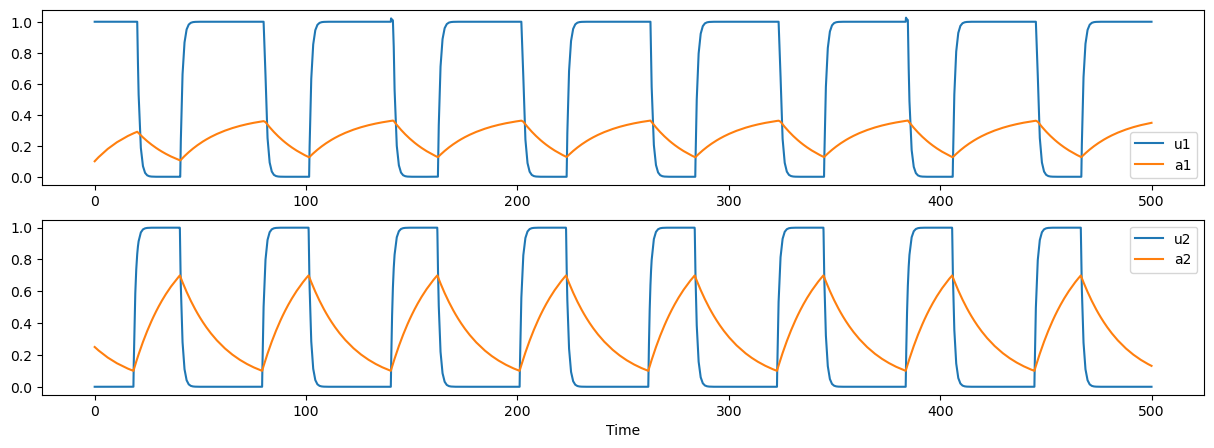

In [41]:
y0 = [1, 0, 0.1, 0.25]
I1, I2 = 0.43, 0.5
t_span = (0, 500)

res = solve_ivp(laing_chow, t_span, y0, args=(I1,I2))

def plot_system(result):
    fig, ax = plt.subplots(2, 1, figsize = (15, 5))
    ax[0].plot(res.t, res.y[0], label='u1')
    ax[0].plot(res.t, res.y[2], label='a1')
    ax[0].legend()
    ax[1].plot(res.t, res.y[1], label='u2')
    ax[1].plot(res.t, res.y[3], label='a2')
    ax[1].legend()
    plt.xlabel('Time')
    plt.show()

plot_system(res)

### 1.3 Compute dominance durations

Let us define population 1 as active if $u_{1} > u_{2}$ and equivalently for population 2. 
Determine the dominance durations $D_{1}$ during which population 1 is active and $D_2$, during which populaion 2 is active, from your simulations.

#### 1.3 a) Implement the function `dominance_durations` (0.5 points)

To do this write a function `dominance_durations(x1, x2, t)` where `x1` and `x2` are arrays containing the simulated states and `t` is an array of the same length containing the corresponding times. The function should return an array containing the duration of each dominance period in the data. 

In [8]:
def dominance_durations(x1, x2, t):
    """
    Compute the dominance duration.
    
    Parameters
    ----------
    x1, x2 : numpy.ndarray
        Arrays containing the simulated states.
    t : numpy.ndarray
        Array of times corresponding to states in `x1` and `x2`.
    
    Returns
    -------
    durations : numpy.ndarray
        Array of durations for each dominance period in the data.
    """
    durations_1 = []
    durations_2 = []
    current_population = None  # Variable to track active population
    start_time = None  # Variable to track the start time of dominance period

    # Iterate through the states and times
    for i in range(len(x1)):
        # Check which population is active based on the given conditions
        if x1[i] > x2[i]:
            population = 1
        elif x1[i] < x2[i]:
            population = 2
        else:
            population = None  # If populations are equal, no dominance

        # If the active population changes or it's the last iteration
        if population != current_population or i == len(x1) - 1:
            # If there was a previous dominance period, calculate its duration
            if current_population is not None:
                duration = t[i] - start_time
                if current_population == 1:
                    durations_1.append(duration)
                else:
                    durations_2.append(duration)
            # Update current population and start time for the new dominance period
            current_population = population
            start_time = t[i]

    return np.array(durations_1), np.array(durations_2)


In [9]:
""" Test that the function `dominance_durations` is defined """

assert_var_defined("dominance_durations", func=True)

#### 1.3 b) Compare the dominance durations in your data to the results of equation (9) (0.5 points)

Use your function to compute the dominance durations from your simulation in exercise 1.2. Then compute the analytical dominance durations $T_1$ and $T_2$ defined in equation (9) in Laing and Chow (2002).


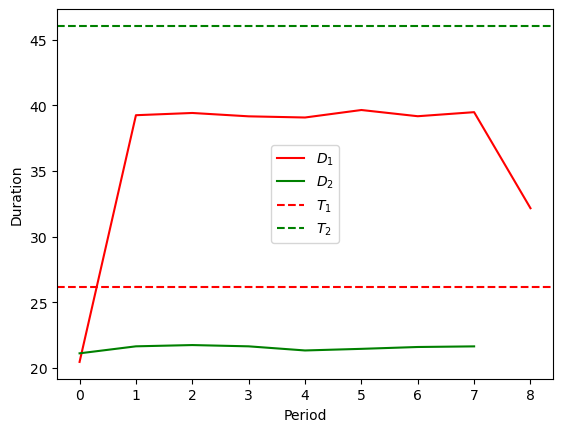

In [42]:
def plot_dominance_durations(t, y, I1, I2):
    durations_1, durations_2 = dominance_durations(y[0], y[1], t)
    T1 = -20 * np.log((I2-0.4)/(0.4+0.4-I1))
    T2 = -20 * np.log((I1-0.4)/(0.4+0.4-I2))

    plt.plot(np.arange(0, len(durations_1)), durations_1, label='$D_1$', color='r')
    plt.plot(np.arange(0, len(durations_2)), durations_2, label='$D_2$', color='g')
    plt.axhline(y=T1, color='r', linestyle='--', label='$T_1$')
    plt.axhline(y=T2, color='g', linestyle='--', label='$T_2$')
    plt.xlabel('Period')
    plt.ylabel('Duration')
    plt.legend()
    plt.show()

plot_dominance_durations(res.t, res.y, 0.43, 0.5)

#### 1.3 c) Explain your observations (0.5 points)

Why are the dominance durations from your simulation different from the analytically computed $T_1$ and $T_2$? (Hint: Reading the paper section that describes the derivation of equation (9) helps here)

### 1.4 Study the parameters of the model

#### 1.4 a) For which parameters do the oscillations stop? (1 point)

The paper states that, if the inputs are larger than $-\alpha + \beta + \varphi $, both populations become active and oscillation will stop. Can you confirm this? 

This can be visually confirmed by picking an epsilon and using it to increment the value of the inputs with respect to the threshold of $-\alpha + \beta + \gamma$. As shown below, the behaviour of the system approaches the case where bot activities are 1.

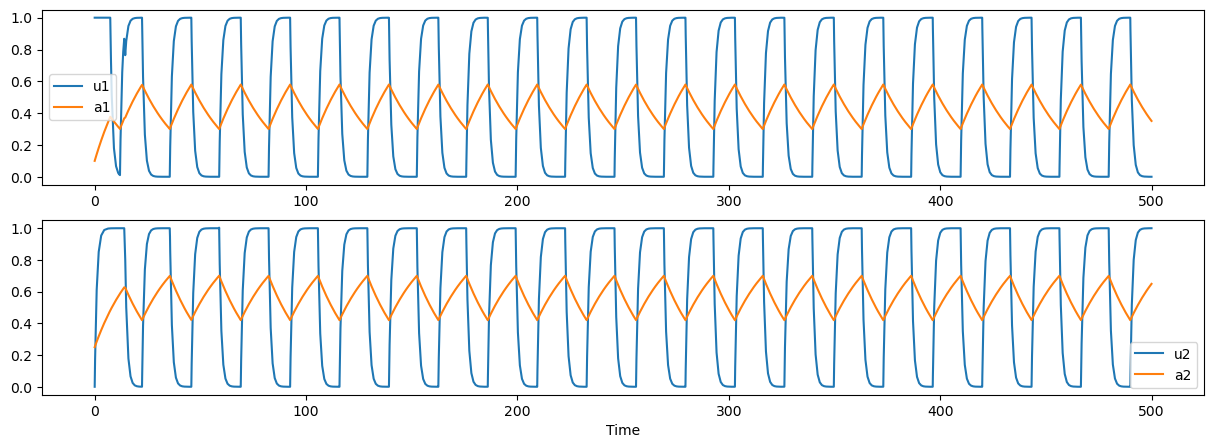

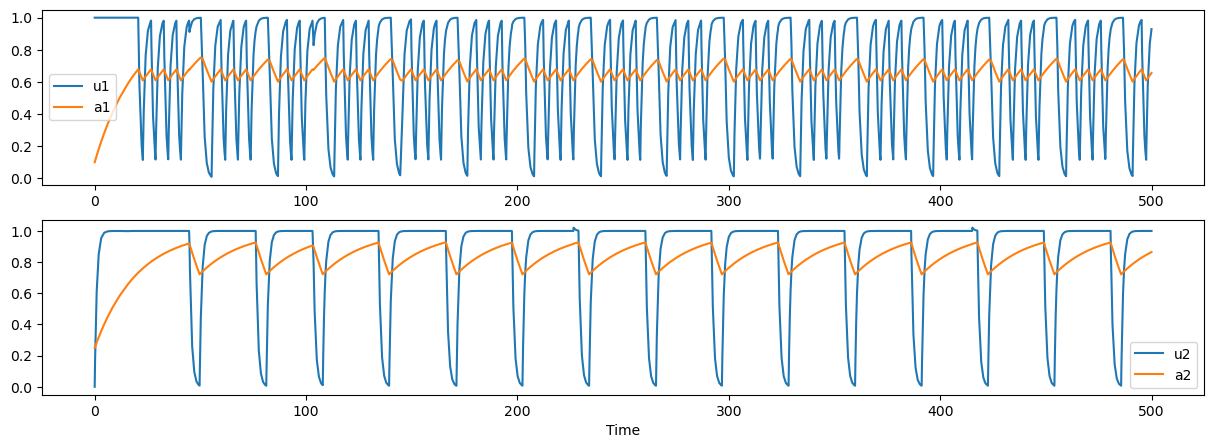

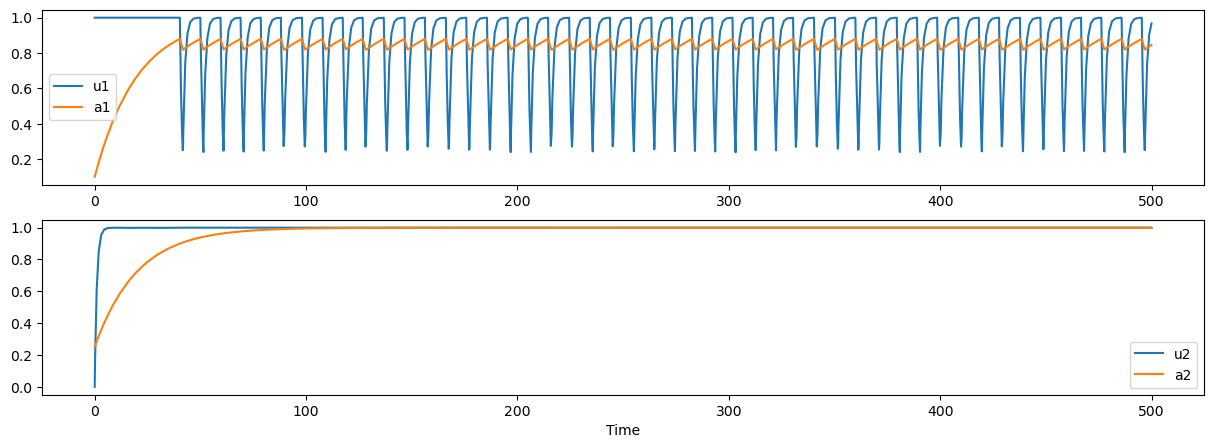

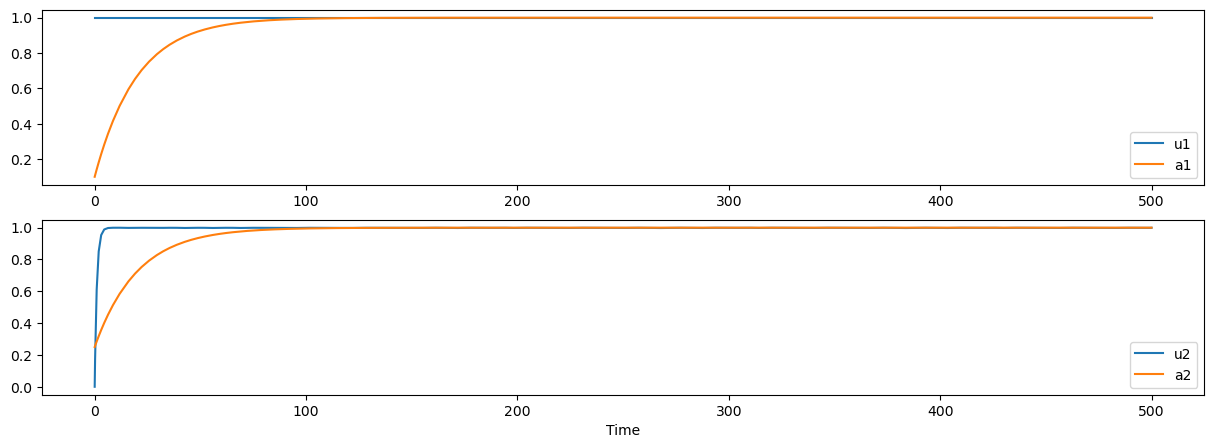

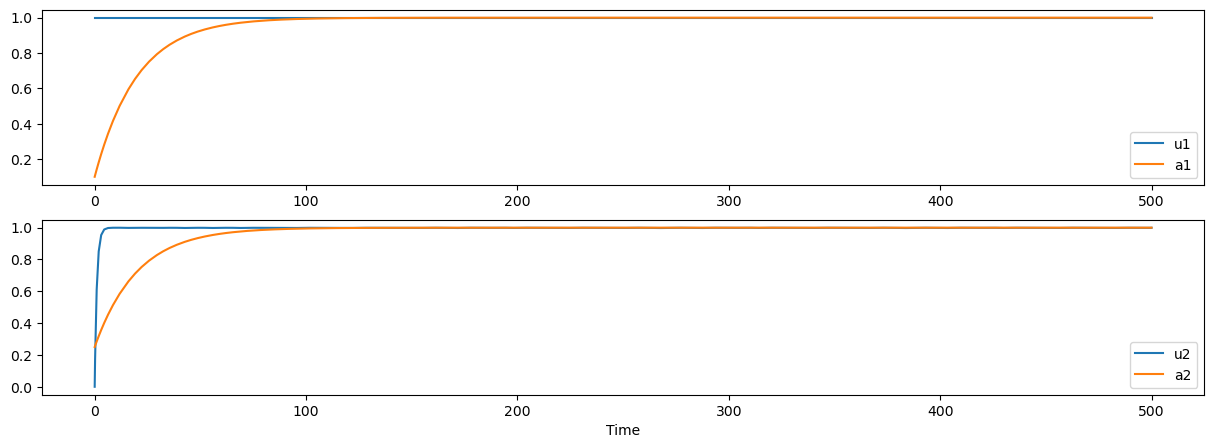

In [39]:
epsilon_vals = [0.1, 0.4, 0.6, 0.8, 1.0]
alpha, beta, phi_a, g1, g2 = 0.2, 0.2, 0.4, 1, 1
t_span = (0, 500)
y0 = [1, 0, 0.1, 0.25]
thresh = -alpha + beta + phi_a

for eps in epsilon_vals:
    I1, I2 = thresh + eps, thresh + eps
    args = (I1, I2, alpha, beta, phi_a, g1, g2)
    res = solve_ivp(laing_chow, t_span, y0, args=args)
    plot_system(res)

#### 1.4 b) What about the parameters inbetween? (0.5 point)

Simulate and plot your results for input values between these new and the original input values.

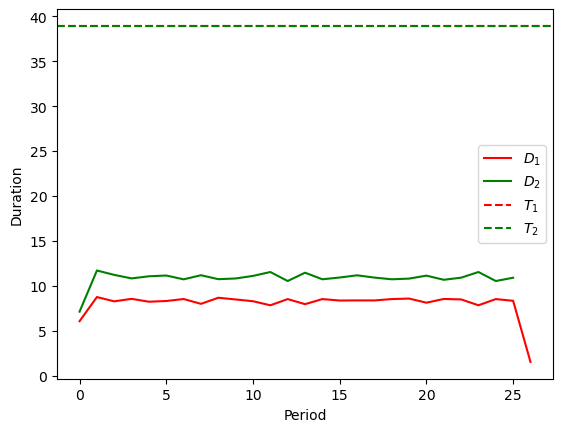

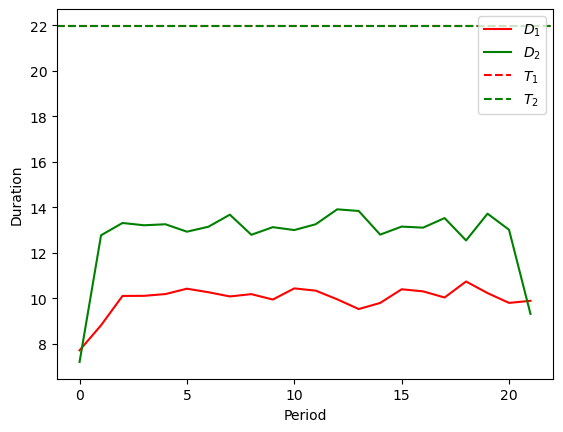

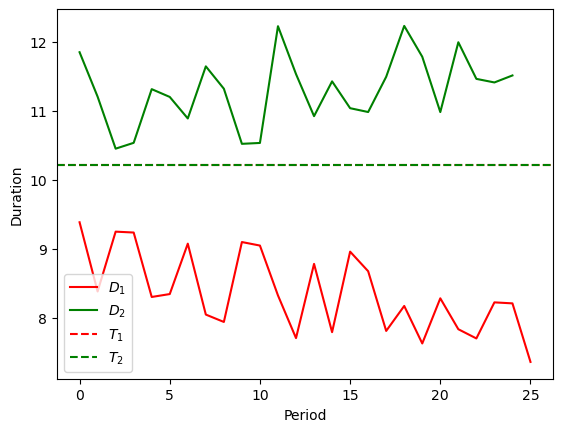

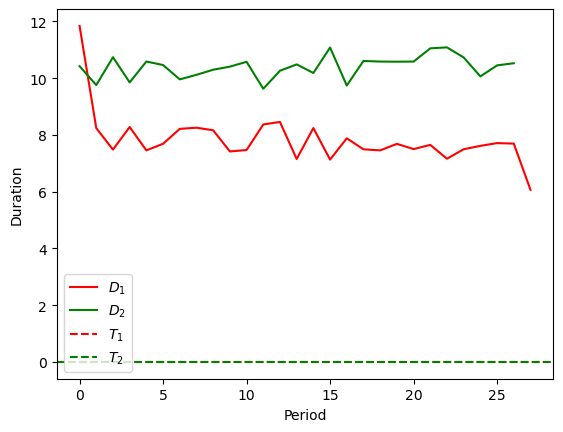

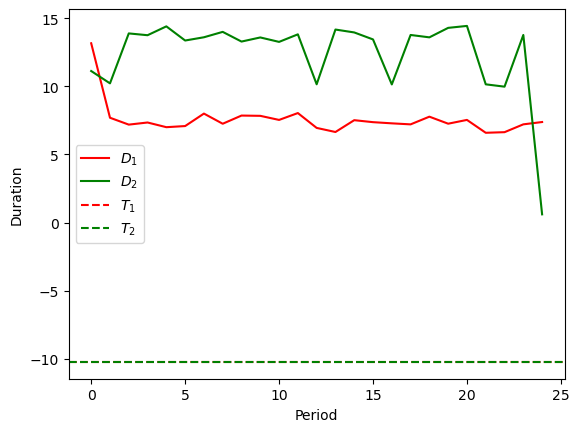

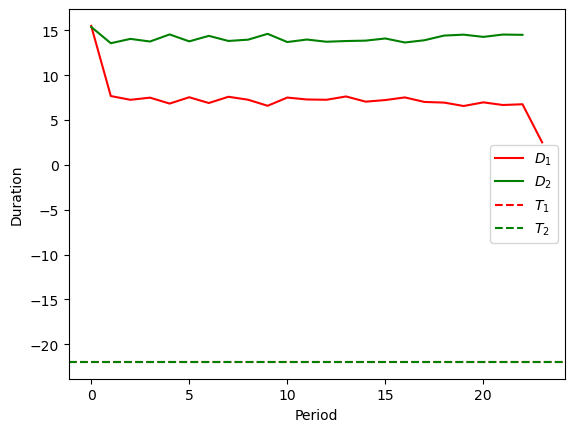

In [43]:
epsilon_vals = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
alpha, beta, phi_a, g1, g2 = 0.2, 0.2, 0.4, 1, 1
t_span = (0, 500)
y0 = [1, 0, 0.1, 0.25]
thresh = -alpha + beta + phi_a

for eps in epsilon_vals:
    I1, I2 = thresh + eps, thresh + eps
    args = (I1, I2, alpha, beta, phi_a, g1, g2)
    res = solve_ivp(laing_chow, t_span, y0, args=args)
    plot_dominance_durations(res.t, res.y, I1, I2)

#### 1.4 c) Discuss your results (1 point)
Do the analytical dominance periods still fit the experimental results? How do you interpret these results?

# Exercise 2: A model of perceptual bistability (13 points)

Next we will investigate a model of perceptual bistability developed by [Moreno-Bote et
al.(2007)](https://journals.physiology.org/doi/pdf/10.1152/jn.00116.2007). 
The model is an attractor network that relies on noise to drive transitions between network states. Once again, while they also present a spiking network model, we will consider only their mean-field firing rate model.

### 2.1 Read the relevant sections of the paper

Familiarize yourself with the mean-field firing rate model in Moreno-Bote et al. (2007).
Read at least the **Abstract**, **Appendix A** and the second section in Appendix B (**Model with inhibition driven indirectly by an excitatory pool and with weak adaptation**).

The model that you will implement is described by equations (A1, B5, B6, B7) and depicted in Fig. 3B of the main text. The results section **Dynamics of the noise-driven rate-based model and the role of weak adaptation** in the main text discusses it.

Here is a copy of the equations which you will be implementing in this exercise (Note: In the paper, there is a inconsistency in equation B5. Instead of $\alpha_A$, here we use $a_A$):

$$
\begin{align}
    \frac{dn}{dt} &= - \frac{n}{\tau_s} + \sigma \sqrt{\frac{2}{\tau_s}} \xi(t) &&\text{(A1)} \\
    \tau \frac{d r_A}{dt} &= -r_A + f(\alpha r_A - \beta r_{A,inh} + g_A - a_A + n_A) &&\text{(B5)} \\
    \tau_a \frac{a_A}{dt} &= -a_A + \gamma r_A \\
    f(x) &= \frac{1}{1 + exp\left(-\frac{(x - \theta)}{k} \right)} &&\text{(B6)} \\
    r_{A,inh} &= (r_{pool} + \eta r_A)^2 &&\text{(B7)} \\
    r_{pool} &= [\phi(r_A + r_B) + g_A + g_B]^+
\end{align}
$$

### 2.2 Limits of `solve_ivp` (0.5 points)

Why can’t you use `scipy.integrate.solve_ivp` to implement this model?

The solver `scipy.integrate.solve_ivp` can only be used to solve systems of ordinary differential equations, which are deterministic systems. However, the model shown above cannot be categorised as deterministic, given that it includes the noise term  $\xi$ in equation A1, which induces stochastic behaviour in the system.

### 2.3 Write your own integration function

You will have to write your own integration function. 
We will use the Euler-Maruyama method. Euler-Maruyama is an extension of the simple Euler method to stochastic differential equations where we here only consider Gaussian noise processes. Euler-Maruyama integrates differential equations of the form

$$
dY(t) = f(Y(t))dt + g(Y(t))dW(t)
$$

here $f(Y(t))$ is the deterministic part of the differential equation and $g(Y(t))dW(t)$ is the stochastic part where $dW(t)$ is a random variable. 

Euler-Maruyama consists of the following update which your function has to implement:

$$
Y_{t} = Y_{t-1} + f(Y_{t-1})\Delta t + g(Y_{t-1}) \sqrt{\Delta t}W_{t}
$$

Each $W_{t}$ is a sample from a standard normal distribution. 
For more information about Euler-Maruyama see e.g. [Higham (2001)](https://epubs.siam.org/doi/pdf/10.1137/S0036144500378302), or [Wikipedia](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method).


#### 2.3 a) Implement the Euler-Maruyama method (2 points)

Write a function `euler_maruyama(ffun, gfun, t_span, y0, dt=0.01, fargs={}, gargs={})` which implements the Euler-Maruyama method for a set of SGEs and which behaves like `solve_ivp` (see the docstring below for details):

- `ffun` and `gfun` implement $f(Y(t))$  and $g(Y(t))$, respectively (as for `solve_ivp`, $Y(t)$ can be multiple SGEs).
- `fargs` and `gargs` are dictionaries of extra arguments that should be passed to `ffun` and `gfun`, respectively. Note, this differs from the argument `args` in `solve_ivp`, which is a tuple. We use dictionaries here since this will make passing parameters easier later in the exercise. Check the function docstring below to see how `ffun` and `gfun` should be called inside `euler_maruyama`.
- In `solve_ivp`, the time points `t` used for evaluating your ODEs during integration depend on the integration method (variable time steps are often used). For the Euler-Maruyama method, we use a fixed integration time step $\Delta t$, which is passed as the `dt` argument to your `euler_maruyama` function.

Hint: To pass a dicitonary of arguments (`fargs` and `gargs`) as keyword arguments to a function (`ffun` and `gfun`), you can make use of the `**` syntax to unpack a dictionary. If you don't know what that means, have a look at e.g. [this introduction to `*args` and `**kwargs`](https://book.pythontips.com/en/latest/args_and_kwargs.html).

In [64]:
def euler_maruyama(ffun, gfun, t_span, y0, fargs={}, gargs={}, dt=0.01):
    """
    Solve a system of stochastic differential equations (SDE). This function behaves
    similar to `scipy.integrate.solve_ivp`, but using the Euler-Maruyama method.
    
    Parameters
    ----------
    ffun : callable
        A function that can be called with `ffun(t, y, **fargs)` and that computes the
        deterministic part f(Y(t)) of the SDEs. `t` should be a scalar and `y` can be an
        iterable of values for multiple SDEs.
    gfun : callable
        A function that can be called with `gfun(t, y, **gargs)` and that computes the
        stochastic part g(Y(t)) of the SDEs. `t` and `y` should be the same as in `ffun`.
    t_span : float
        Same as `t_span` in `scipy.integrate.solve_ivp`.
    y0 : numpy.ndarray
        Same as `y0` in `scipy.integrate.solve_ivp`.
    fargs : dict, optional
        Extra keyword arguments passed to `ffun`.
    gargs : dict, optional
        Extra keyword arguments passed to `gfun`.
    dt : float, optional
        The integration time step.
        
    Returns
    -------
    t : numpy.ndarray
        Time points used during integration.
    y : numpy.ndarray
        Array of shape `(len(y0), len(t))` with values of the integrated SDEs at time points `t`.
    """

    t = np.arange(t_span[0], t_span[1], dt)
    y = np.ones((len(y0), len(t)))
    # np.random.seed(1)
    for i in range(1, len(t)):
        y[:, i] = y[:, i-1] + ffun(t, y[:, i-1], **fargs)*dt + gfun(t, y[:, i-1], **gargs) * dt**0.5 * np.random.normal(loc=0.0, scale=dt, size=(len(y0))) 

    return t, y

In [65]:
""" Test that the function `euler_maruyama` is defined """

assert_var_defined("euler_maruyama", func=True)

#### 2.3 b) Test your implementation (0.5 points)

Test your function by using `ffun=laing_chow` and with `gfun` returning alwyas `0` (hint: you can implement `gfun` compactly using [Python’s `lambda` notation](https://book.pythontips.com/en/latest/lambdas.html)). 
For small enough time steps ($\Delta t$ = 0.1 should be sufficient) you should get the same results as with `solve_ivp`.

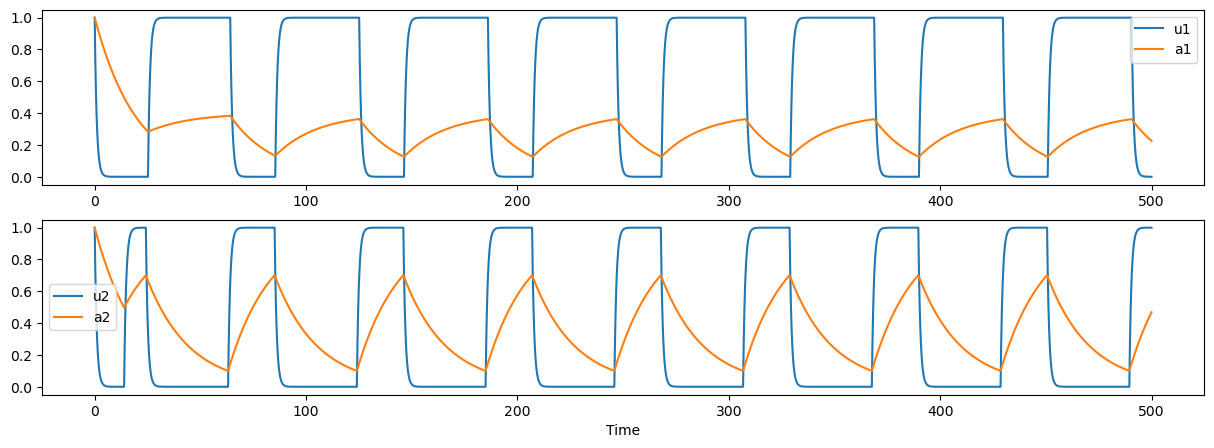

In [66]:
t_span = (0, 500)
dt = 0.1
y0 = [1, 0, 0.1, 0.25]
I1, I2 = 0.43, 0.5

t, y = euler_maruyama(ffun=laing_chow, fargs={'I1': I1, 'I2': I2}, t_span=t_span, y0=y0, gfun=lambda t, y: 0, dt=dt)
fig, ax = plt.subplots(2, 1, figsize = (15, 5))
ax[0].plot(t, y[0], label='u1')
ax[0].plot(t, y[2], label='a1')
ax[0].legend()
ax[1].plot(t, y[1], label='u2')
ax[1].plot(t, y[3], label='a2')
ax[1].legend()
plt.xlabel('Time')
plt.show()


### 2.4 Integrate some typical stochastic processes

#### 2.4 a) Simulate (1.5  points)
Simulate 4 stochastic differential equations. For two simulations, use $f(Y(t)) = 0$, for the other two use $f(Y(t)) = - \frac{1}{\tau} Y(t)$. For all simulations, use $g(Y(t)) = \frac{1}{\tau}$. Run both of these configurations with both, $\tau = 0.1$ and $\tau = 1$. 

Simulate all 4 stochastic differential equations between $t=0$ and $t=5$ with integration time step $\Delta t = 0.01$. Vary your initial condition and pick one for which you can visually see the difference between the stochastic processes.

Plot all results in one figure panel.

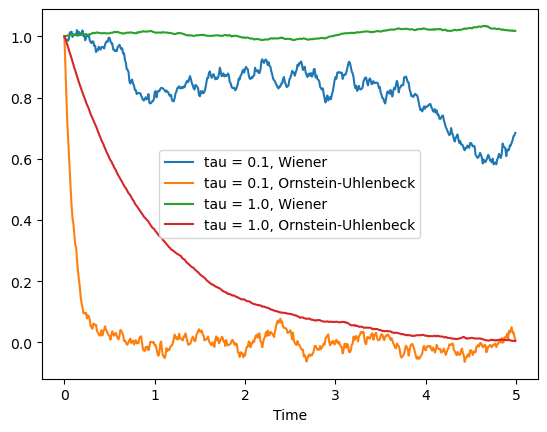

In [67]:
t_span = (0, 5)
dt = 0.01
num_simulations = 4
tau = [0.1, 1.0]
y0 = [5]

t, y = euler_maruyama(ffun=lambda t, y: 0, gfun=lambda t, y: 1/tau[0],  y0=y0, t_span=t_span, dt=dt)
plt.plot(np.arange(t_span[0], t_span[1], dt), y[0,:], label=f'tau = {tau[0]}, Wiener')
t, y = euler_maruyama(ffun=lambda t, y: -((1/tau[0])*y), gfun=lambda t, y: 1/tau[0], y0=y0, t_span=t_span, dt=dt)
plt.plot(np.arange(t_span[0], t_span[1], dt), y[0,:], label=f'tau = {tau[0]}, Ornstein-Uhlenbeck')

t, y = euler_maruyama(ffun=lambda t, y: 0, gfun=lambda t, y: 1/tau[1], y0=y0, t_span=t_span, dt=dt)
plt.plot(np.arange(t_span[0], t_span[1], dt), y[0,:], label=f'tau = {tau[1]}, Wiener')
t, y = euler_maruyama(ffun=lambda t, y: -((1/tau[1])*y), gfun=lambda t, y: 1/tau[1], y0=y0, t_span=t_span, dt=dt)
plt.plot(np.arange(t_span[0], t_span[1], dt), y[0,:], label=f'tau = {tau[1]}, Ornstein-Uhlenbeck')

plt.xlabel('Time')
plt.legend()
plt.show()

#### 2.4 c) Discuss your results (1.5 points)

Compare the results of the four simulations. 
What is similar? 
What is different? (hint: look up Wiener processes and Ornstein-Uhlenbeck processes. Your answer should incorporate these terms.)

The simulations which were run with the lower $\tau$ value exhibit less noisy trajectories, that is, $\tau$ appears to induce a degree of smoothness.The simulations which correspond to Ornstein-Uhlenbeck processes seem to tend towards a certain value over time, exhibiting a decay from the starting point. This is reflected in the function $f(Y(t)) = - \frac{1}{\tau} Y(t)$. The simulations which correspond to Wiener processes (i.e. where $f(Y(t)) = 0$) in contrast exhibit behaviour comparable to a random walk. 

Note that Ornstein-Uhlenbeck processes can be considered a modification of Wiener processes by choice of the function $f$ (which is effectively 0 in a Wiener process).

### 2.5 Implement the model for perceptual bistability

#### 2.5 a) Implement the mean-field firing rate model by Moreno-Bote et al. (2007) (3 points)

Complete functions `f_moreno_bote` and `g_moreno_bote` which implement equations (A1, B5, B6, B7) of Moreno-Bote et al. (2007). Follow these instructions:
1. The equations B5 and B7 describe the dynamics of a single population A. You need to simulate a second population B that follows the same dynamics (see Fig. 3B of the main text). That means you will have a total of 6 stochastic differential equations (SDEs).
2. Note the stochastic part of the equations, which is the only part that will be computed in `g_moreno_bote`. 
3. Both functions, `f_moreno_bote` and `g_moreno_bote`, take an array of size 6 as intput for their argument `y` and return an array of the same size.
4. For the automatic corrections to work correctly, the order in which the dynamical variables of the model are passed in `y` has to be

    `y = [r_A, r_B, alpha_A, alpha_B, n_A, n_B]`
    
5. You will start by use the same parameter settings as in the paper. Those parameters should be the default function arguments (as which they are already defined). These are:

$$
\begin{align}
    g_{A} = g_{B} &= 0.05 \\
    \alpha &= 0.75 \\
    \beta &= 0.5 \\
    \varphi &= 0.5 \\
    \tau &= 0.01 \\
    \tau_{a} = \tau_{b} &= 2 \\
    \tau_{s} &= 0.1 \\
    \sigma &= 0.03 \\
    \eta &= 0.5 \\
    \theta &= 0.1 \\
    k &= 0.05
\end{align}
$$



In [68]:
def sigmoid(x, theta=0.1, k=0.05):
    return 1/(1+np.exp(-(x-theta)/k))

In [69]:
def f_moreno_bote(t, y, g_A=0.05, g_B=0.05, alpha=0.75, beta=0.5, gamma=0.1, phi=0.5,
                  tau=0.01, tau_a=2, tau_s=0.1, eta=0.5, theta=0.1, k=0.05):
    """
    Function that computes the deterministic part of the set of SDEs defined in
    Moreno-Bote et. al (2007).
    
    Parameters
    ----------
    t : float
        Time point for which to compute the derivatives of `y`.    
    y : numpy.ndarray
        Array of size 6 with deterministic part of the dynamical variables at time `t`:
        `y = [r_A, r_B, alpha_A, alpha_B, n_A, n_B]`.
    g_A, g_B, alpha, beta, gamma, phi, tau, tau_a, tau_s, eta, theat, k : float, optional
        Model parameters, see Moreno-Bote et al. (2007).
    
    Returns
    -------
    dydt : numpy.ndarray
        Derivatives of `y` at time `t`.
    """
    r_pool = phi*(y[0]+y[1]+g_A+g_B)
    r_Ainh, r_Binh = (r_pool+eta*y[0])**2, (r_pool+eta*y[1])**2
    
    drAdt = (1/tau) * (-y[0] + sigmoid((alpha*y[0] - beta*r_Ainh + g_A - y[2] + y[4]), theta=theta, k=k))
    drBdt = (1/tau) * (-y[1] + sigmoid((alpha*y[1] - beta*r_Binh + g_B - y[3] + y[5]), theta=theta, k=k))
    dalphaAdt = (1/tau_a) * (-y[2] + gamma*y[0])
    dalphaBdt = (1/tau_a) * (-y[3] + gamma*y[1])
    
    dydt = np.array([drAdt, drBdt, dalphaAdt, dalphaBdt, 0.0, 0.0])
    return dydt


def g_moreno_bote(t, y, sigma=0.03, tau_s=0.1):
    """
    Function that computes the stochastic part of the set of SDEs defined in
    Moreno-Bote et. al (2007).
    
    Parameters
    ----------
    t : float
        Time point for which to compute the derivatives of `y`.
    y : numpy.ndarray
        Array of size 6 with stochastic part of the dynamical variables at time `t`:
        `y = [r_A, r_B, alpha_A, alpha_B, n_A, n_B]`.
    sigma, tau_s : float, optional
        Model parameters, see Moreno-Bote et al. (2007).
    
    Returns
    -------
    dydt : numpy.ndarray
        Derivatives of `y` at time `t`.
    """
    dnAdt = -(1/tau_s)*y[4] + sigma*((2/tau_s)**0.5)
    dnBdt = -(1/tau_s)*y[5] + sigma*((2/tau_s)**0.5)
    dydt = np.array([0.0, 0.0, 0.0, 0.0, dnAdt, dnBdt])
    
    return dydt

In [70]:
""" Test that the functions `f_moreno_bote` and `g_moreno_bote` are defined """

for function in ["f_moreno_bote", "g_moreno_bote"]:
    assert_var_defined(function, func=True)

#### 2.5 b) Simulate the model (1 point)

Simulate the model from $t=0$ to $t=20$ with $\Delta t = 0.01$ with the same parameters as in the paper (that means use the default $\gamma = 0.1$).

Use the following initial conditions for $t=0$:

$$
\begin{align}
    r_{A} &= 1 \\
    r_{B} &= 0.01 \\
    \alpha_{A} &= 0 \\
    \alpha_{B} &= 0.04 \\
    n_{A} = n_{B} &= 0
\end{align}
$$

Visualize the results using three subplots: Firing rates, hyperpolarizing currents and noise.

[1.00000000e+00 4.42770410e-05 2.48773998e-01 ... 7.33594751e-01
 9.86618154e-01 7.03367629e-01]
[1.00000000e+00 4.42770410e-05 3.82188314e-01 ... 9.99998512e-01
 9.99999952e-01 9.99998201e-01]


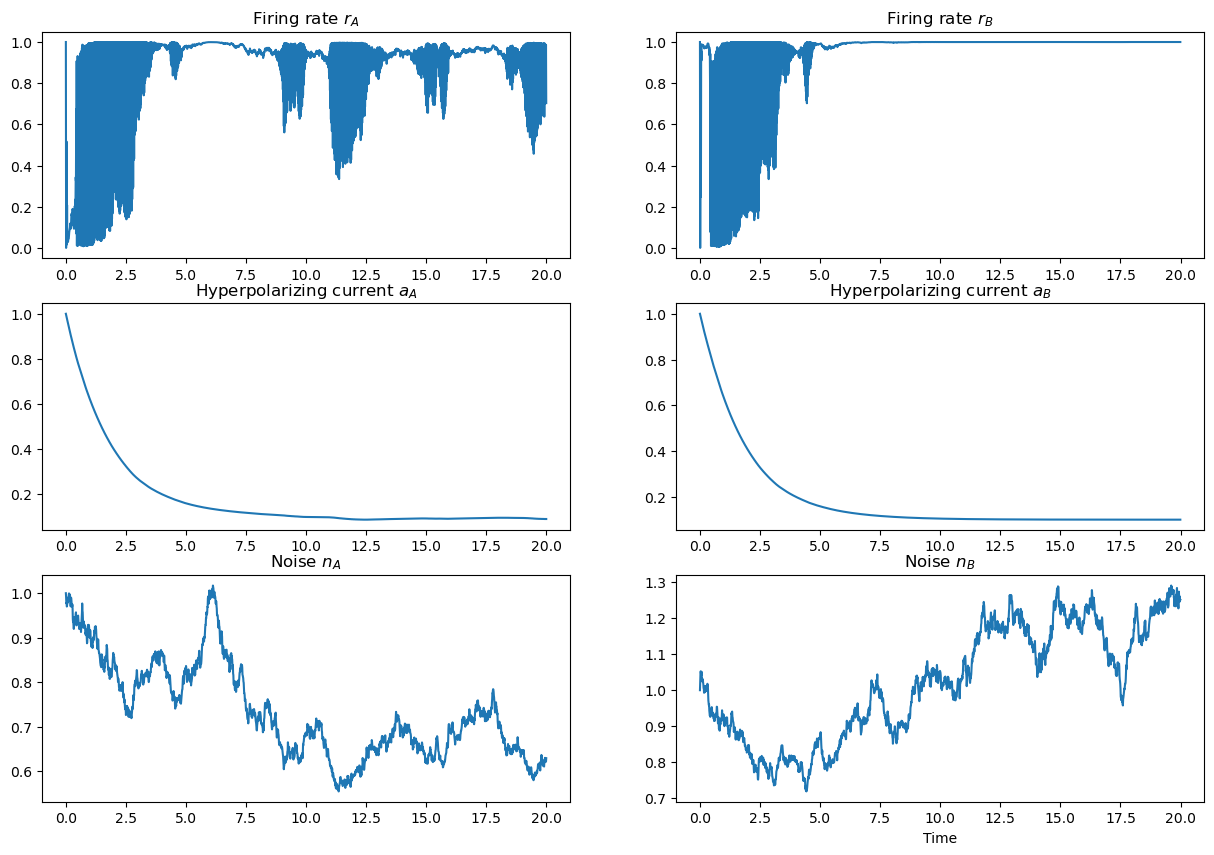

In [83]:
np.random.seed(1)
y0 = [1, 0.01, 0.0, 0.04, 0, 0]
t_span = (0, 20)
dt = 0.01

t, y = euler_maruyama(ffun=f_moreno_bote, gfun=g_moreno_bote, t_span=t_span, y0=y0, dt=dt)
print(y[0])
print(y[1])
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
ax[0,0].plot(t, y[0,:])
ax[0,0].set_title('Firing rate $r_A$')
ax[0,1].plot(t, y[1,:])
ax[0,1].set_title('Firing rate $r_B$')
ax[1,0].plot(t, y[2, :])
ax[1,0].set_title('Hyperpolarizing current $a_A$')
ax[1,1].plot(t, y[3, :])
ax[1,1].set_title('Hyperpolarizing current $a_B$')
ax[2,0].plot(t, y[4, :])
ax[2,0].set_title('Noise $n_A$')
ax[2,1].plot(t, y[5, :])
ax[2,1].set_title('Noise $n_B$')
plt.xlabel('Time')
plt.show()

### 2.6 Calculate the dominance durations (1 point)

Now simulate for $t$ up to 500 (again with $\Delta t$ = 0.01). 
Determine the dominance durations (if you implemented it correctly, you can simply use function dominance durations from exercise 1). 
Plot a histogram of the dominance durations (write a function, you can reuse it below).
What is the mean of the dominance durations? Mark it in the histogram (e.g. with `plt.axvline`).

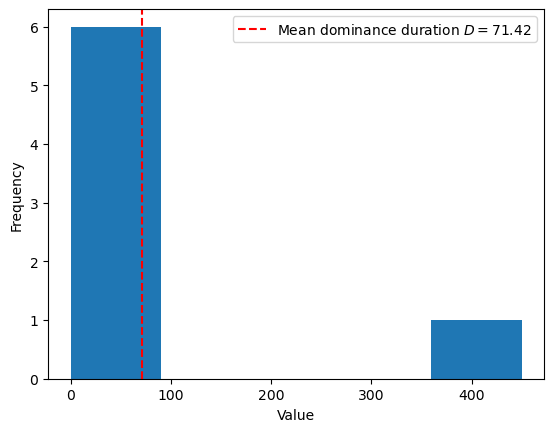

In [84]:
y0 = [1, 0.01, 0.0, 0.04, 0, 0]
t_span = (0, 500)
dt = 0.01

t, y = euler_maruyama(ffun=f_moreno_bote, gfun=g_moreno_bote, t_span=t_span, y0=y0, dt=dt)

durations_A, durations_B = dominance_durations(y[0], y[1], t)

def plot_durations_histogram(durations_A, durations_B):
    durations = np.concatenate((durations_A, durations_B))
    plt.hist(durations, bins=5)
    mean_duration = np.mean(durations)
    plt.axvline(mean_duration, color='r', linestyle='--', label=f'Mean dominance duration $D={mean_duration:.2f}$')
    plt.legend()
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

plot_durations_histogram(durations_A, durations_B)

### 2.7 Study the effect of $\gamma$

#### 2.7 a) Simulate with $\gamma=0$  (0.5 point)
Repeat your simulation with γ = 0 and estimate the mean dominance duration.


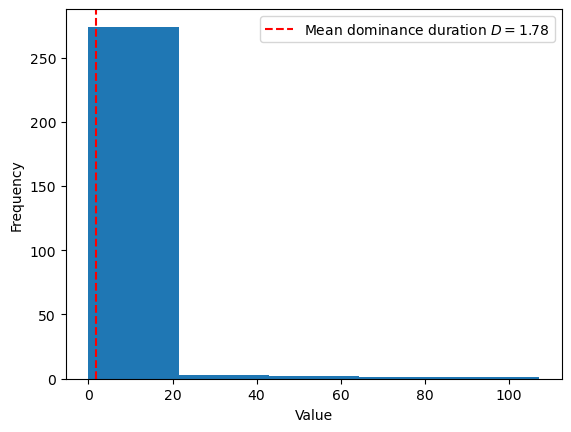

In [85]:
gamma = 0
t, y = euler_maruyama(ffun=f_moreno_bote, fargs={'gamma': gamma}, gfun=g_moreno_bote, t_span=t_span, y0=y0, dt=dt)
durations_A, durations_B = dominance_durations(y[0], y[1], t)
plot_durations_histogram(durations_A, durations_B)


#### 2.8 b) Discuss the effect of $\gamma$ (0.5 points)
What is the influence of $\gamma$ in the model? How and why does the histogram change if you choose $\gamma$ = 0? 

$\gamma$ defines the maximum amplitude of the hyperpolarizing currents. Setting it to 0 effectively leads to the hyperpolarizing current having a trajectory with exponential decay to 0. This is a lower value than the default value of $\gamma$ used in the previous experiment, which was 0.1. Correspondingly, the firing rate decreases at a slower rate, which leads to higher dominance durations, reflected in the histogram by the rightward shift in the distribution and the higher mean.

### 2.8 Find a different parameter set that produces similar dominance durations

#### 2.8 a) Find parameters and plot histograms (0.5 point)
Try to find a setting of parameters with $\gamma$ = 0 which has a mean dominance duration close (within 0.2 time units) to the first simulation from exercise 2.6.
Show all three duration distributions in one histogram plot.


In [ ]:
gamma = 0
t, y = euler_maruyama(ffun=f_moreno_bote, gfun=g_moreno_bote, t_span=t_span, y0=y0, dt=dt)
durations_A, durations_B = dominance_durations(y[0], y[1], t)
plot_durations_histogram(durations_A, durations_B)

#### 2.8 b) Discuss your results (0.5 point)
How do the histograms differ? How is that related to the parameters that you chose?

YOUR ANSWER HERE